# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
#Your code here
import pandas as pd
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
import flatiron_stats as fistats

df_schema = pd.read_csv('schema.csv')

df_responses = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
print(df_responses.info())
print(df_responses.describe())
df_responses.head()

/Users/stevencontreras/anaconda3/envs/learn-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, com

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

## $H_0$ Hypothesis
Qualitative:

$H_0$: Salary of those with Masters degrees is less than the salary of those with Bachelors degrees.

<p><br><br>
Quantitative:

$H_0$: $\mu_m < \mu_b$.

<p><br><br>

## $H_a$ Hypothesis
Qualitative:

$H_a$: Salary of those with Masters degrees is greater than (or equalt to) the salary of those with Bachelors degrees.

<p><br><br>
Quantitative:

$H_a$: $\mu_m \ge \mu_b$.

<p><br><br>

### Thus, based on $H_0$, a one-sided test is required.

In [2]:
#Your code here
df_bachelor = df_responses[df_responses.FormalEducation=="Bachelor's degree"]
print(df_bachelor.info()) # this doesn't provide much useful info, but based on the initial call to head(), we saw that there were a lot of NaNs
# so let's just filter out null values now
df_non_null_interesting_responses = df_responses[(~df_responses.FormalEducation.isnull()) & (~df_responses.AdjustedCompensation.isnull())]
df_non_null_interesting_responses.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4811 entries, 0 to 26390
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 8.5+ MB
None


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,250000.0
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802310,64184.8
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017402,20882.4
11,Male,India,27.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015620,1483.9
14,Male,Taiwan,26.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033304,36634.4


In [3]:
df_bachelor = df_non_null_interesting_responses[df_non_null_interesting_responses.FormalEducation=="Bachelor's degree"]
print(df_bachelor.info(), "\n")

b_median = df_bachelor.AdjustedCompensation.median()
print(f"median salary of those with bachelor's: {b_median}")
b_mean = df_bachelor.AdjustedCompensation.mean()
print(f"mean salary of those with bachelor's: {b_mean}")
b_sd = df_bachelor.AdjustedCompensation.std()
print(f"std dev of salary of those with bachelor's: {b_sd}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 8 to 26195
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 2.0+ MB
None 

median salary of those with bachelor's: 38399.4
mean salary of those with bachelor's: 64887.097994618794
std dev of salary of those with bachelor's: 306935.8723879783


In [4]:
df_master = df_non_null_interesting_responses[df_non_null_interesting_responses.FormalEducation=="Master's degree"]
print(df_master.info(), "\n")

m_median = df_master.AdjustedCompensation.median()
print(f"median salary of those with master's: {m_median}")
m_mean = df_master.AdjustedCompensation.mean()
print(f"mean salary of those with master's: {m_mean}")
m_sd = df_master.AdjustedCompensation.std()
print(f"std dev of salary of those with master's: {m_sd}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 3 to 26378
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 3.5+ MB
None 

median salary of those with master's: 53812.17000000001
mean salary of those with master's: 69139.8998712
std dev of salary of those with master's: 135527.2085045828


In [5]:
delta_medians = abs(m_median - b_median)
delta_means = abs(m_mean - b_mean)

display(HTML(f"$\delta mean = {delta_means}$, $\delta median = {delta_medians}$"))

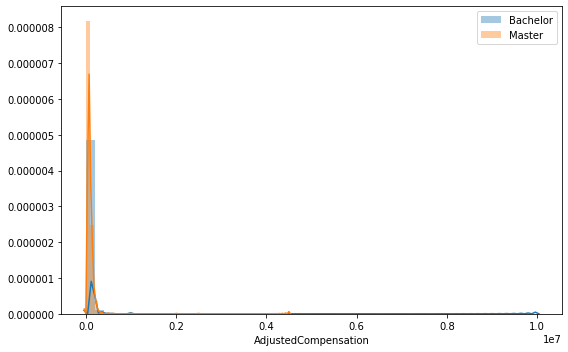

In [6]:
fig = plt.figure(figsize=(8,5))

sns.distplot(df_bachelor.AdjustedCompensation, label="Bachelor")
sns.distplot(df_master.AdjustedCompensation, label="Master")

plt.legend()
fig.tight_layout();
plt.show();

In [7]:
p_value = fistats.p_value_welch_ttest(df_master.AdjustedCompensation, df_bachelor.AdjustedCompensation, two_sided=False)
print(f"initial p-value: {p_value}")

initial p-value: 0.33077639451272445


Based on the initial distplots, as well as the horrid p-value of 0.33, we do not trust that this dataset is providing good values.

There must be some problem with outliers.

Let's investigate.

bachelor: min=0.0, max=9999999.0


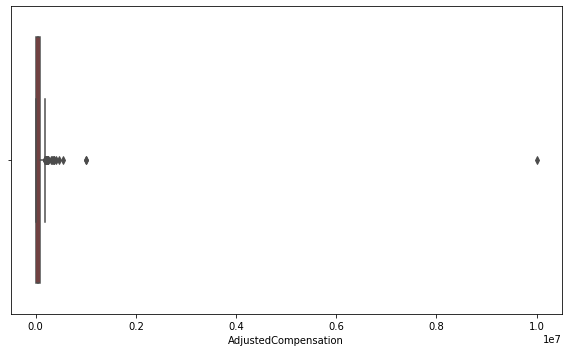


master: min=0.0, max=4498900.0


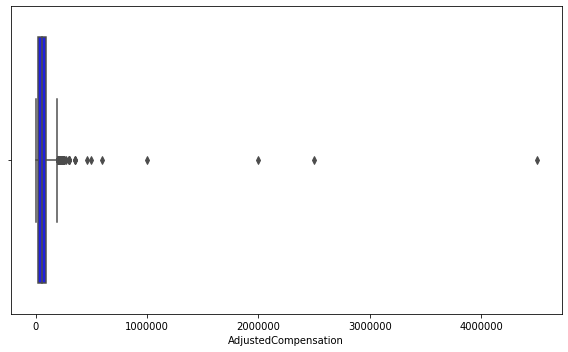

In [8]:
print(f"bachelor: min={df_bachelor.AdjustedCompensation.min()}, max={df_bachelor.AdjustedCompensation.max()}")
fig = plt.figure(figsize=(8,5))
sns.boxplot(df_bachelor.AdjustedCompensation, color="red")
fig.tight_layout()
plt.show();

print(f"\nmaster: min={df_master.AdjustedCompensation.min()}, max={df_master.AdjustedCompensation.max()}")
fig = plt.figure(figsize=(8,5))
sns.boxplot(df_master.AdjustedCompensation, color="blue")
fig.tight_layout()
plt.show();

bachelor: max=1000000.0


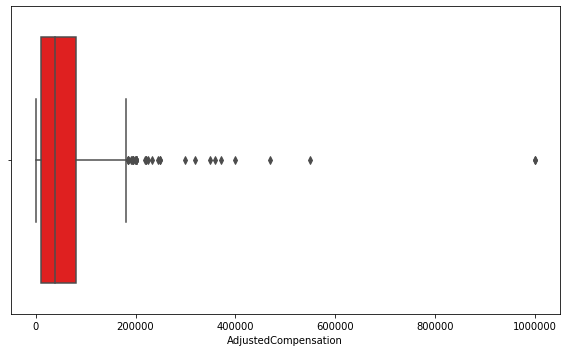

In [9]:
apparent_bachelor_outlier_salary = df_bachelor.AdjustedCompensation.max()
df_bachelor_outliers = df_bachelor[df_bachelor.AdjustedCompensation==apparent_bachelor_outlier_salary]
df_bachelor_2 = df_bachelor.drop(df_bachelor_outliers.index)
print(f"bachelor: max={df_bachelor_2.AdjustedCompensation.max()}")

fig = plt.figure(figsize=(8,5))
sns.boxplot(df_bachelor_2.AdjustedCompensation, color="red")
fig.tight_layout()
plt.show();

master: max=2500000.0


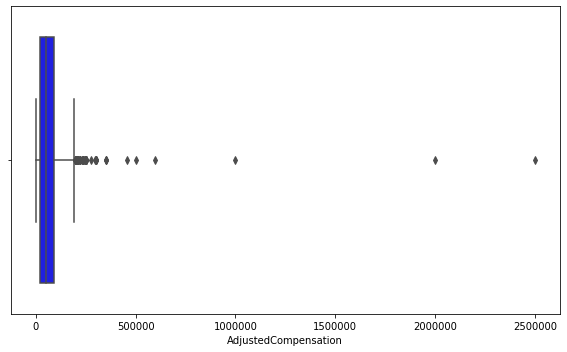

In [10]:
apparent_master_outlier_salary = df_master.AdjustedCompensation.max()
df_master_outliers = df_master[df_master.AdjustedCompensation==apparent_master_outlier_salary]
df_master_2 = df_master.drop(df_master_outliers.index)
print(f"master: max={df_master_2.AdjustedCompensation.max()}")

fig = plt.figure(figsize=(8,5))
sns.boxplot(df_master_2.AdjustedCompensation, color="blue")
fig.tight_layout()
plt.show();

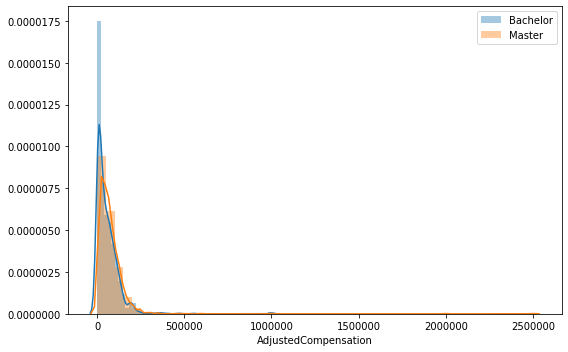

In [11]:
fig = plt.figure(figsize=(8,5))

sns.distplot(df_bachelor_2.AdjustedCompensation, label="Bachelor")
sns.distplot(df_master_2.AdjustedCompensation, label="Master")

plt.legend()
fig.tight_layout()
plt.show();

There are still some CRAZY salaries reported.  For example, even after focusing on one particular nasty outliter value in Bachelor's, there still appears to be at least one salary of 1,000,000 USD!  A million bucks?!  Also, for Master's, there appear to be some salaries approx. equal to 2.5 million USD?!  No.  Just no.

Let's start over and get a percentage of observations that are reported with salaries greater than 500k USD.

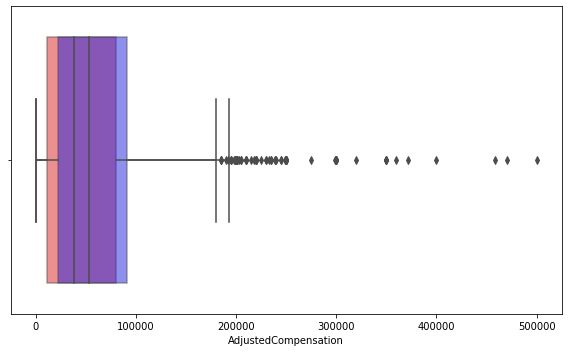

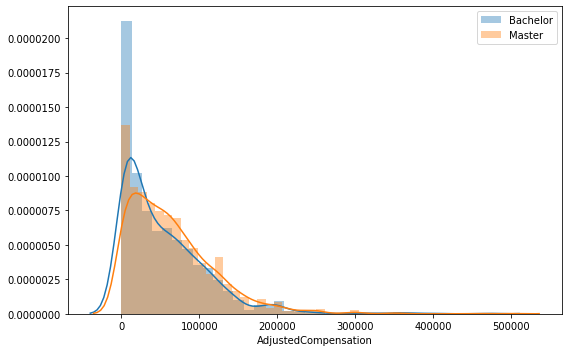

In [12]:
df_outliers = df_non_null_interesting_responses[df_non_null_interesting_responses.AdjustedCompensation > 500000]
len(df_outliers)/len(df_non_null_interesting_responses)

#records with salaries greater than 500k USD make up about .3% of the population but those salaries really throw things off
#so let's drop them!
df_non_null_interesting_responses_2 = df_non_null_interesting_responses.drop(df_outliers.index)
df_bachelor = df_non_null_interesting_responses_2[df_non_null_interesting_responses_2.FormalEducation=="Bachelor's degree"]
df_master = df_non_null_interesting_responses_2[df_non_null_interesting_responses_2.FormalEducation=="Master's degree"]

fig = plt.figure(figsize=(8,5))
sns.boxplot(df_bachelor.AdjustedCompensation, color="red", boxprops={'alpha':0.5})
sns.boxplot(df_master.AdjustedCompensation, color="blue", boxprops={'alpha':0.5})
fig.tight_layout()
plt.show();

fig = plt.figure(figsize=(8,5))
sns.distplot(df_bachelor.AdjustedCompensation, label="Bachelor")
sns.distplot(df_master.AdjustedCompensation, label="Master")
plt.legend()
fig.tight_layout()
plt.show();

This looks much better.  Let's see what kind of p-value we now get.

In [13]:
p_value = fistats.p_value_welch_ttest(df_master.AdjustedCompensation, df_bachelor.AdjustedCompensation, two_sided=False)
print(f"p-value: {p_value}")

p-value: 4.4874583271514723e-07


## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [14]:
df_non_null_interesting_responses_2.FormalEducation.unique()

array(["Master's degree", "Bachelor's degree", 'Doctoral degree',
       "Some college/university study without earning a bachelor's degree",
       'I did not complete any formal education past high school',
       'Professional degree', 'I prefer not to answer'], dtype=object)

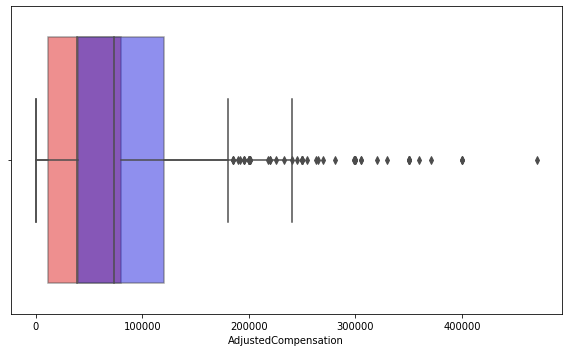

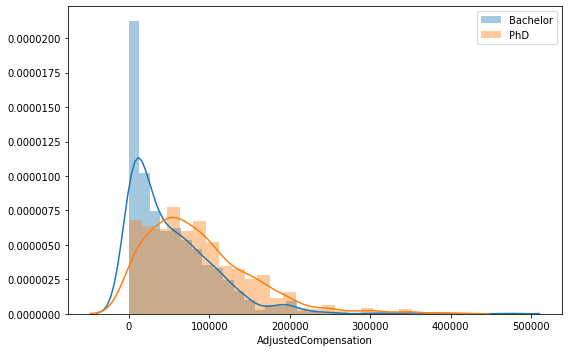

In [15]:
df_phd = df_non_null_interesting_responses_2[df_non_null_interesting_responses_2.FormalEducation=="Doctoral degree"]

fig = plt.figure(figsize=(8,5))
sns.boxplot(df_bachelor.AdjustedCompensation, color="red", boxprops={'alpha':0.5})
sns.boxplot(df_phd.AdjustedCompensation, color="blue", boxprops={'alpha':0.5})
fig.tight_layout()
plt.show();

fig = plt.figure(figsize=(8,5))
sns.distplot(df_bachelor.AdjustedCompensation, label="Bachelor")
sns.distplot(df_phd.AdjustedCompensation, label="PhD")
plt.legend()
fig.tight_layout()
plt.show();

In [16]:
p_value = fistats.p_value_welch_ttest(df_phd.AdjustedCompensation, df_bachelor.AdjustedCompensation, two_sided=False)
print(f"p-value: {p_value}")

p-value: 0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [17]:
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = "AdjustedCompensation ~ C(FormalEducation)"
lm = ols(formula, df_non_null_interesting_responses_2).fit()
table = sm.stats.anova_lm(lm, typ=2)
table

,sum_sq,df,F,PR(>F)
C(FormalEducation),5.841881e+11,6.0,29.224224,1.727132e-34
Residual,1.439270e+13,4320.0,NaN,NaN


In [18]:
print(f"p-value of C(FormalEducation) from ANOVA: {table.loc['C(FormalEducation)']['PR(>F)']}")

p-value of C(FormalEducation) from ANOVA: 1.7271321801975168e-34


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!